<a href="https://colab.research.google.com/github/Chrisphine0/Avertisment_site/blob/master/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Load the dataset
file_path = '/content/ulabox_orders_with_categories_partials_2017.csv'
df = pd.read_csv(file_path)

In [15]:
# Display the first few rows of the dataframe
print(df.head())

   customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0  


In [16]:
# Check the data types and for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB
None


In [17]:
print(df.isnull().sum())

customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64


In [19]:
# Define the features (X) and target (y)
X = df[['total_items', 'discount%', 'weekday', 'hour']]
y = df['Fresh%']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions and evaluate the model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 524.3257141352464


In [23]:
# Display the coefficients
print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')

Coefficients: [ 0.26410848 -0.2725132   0.06780599  0.07857456]
Intercept: 12.650739567090652


In [25]:
# Example cost coefficients for each category
costs = {
    'Food%': 1.2,
    'Fresh%': 2.0,
    'Drinks%': 1.5,
    'Home%': 1.1,
    'Beauty%': 1.3,
    'Health%': 1.8,
    'Baby%': 2.1,
    'Pets%': 1.4
}

In [26]:
# Convert the dictionary to a list
c = [costs['Food%'], costs['Fresh%'], costs['Drinks%'], costs['Home%'], costs['Beauty%'], costs['Health%'], costs['Baby%'], costs['Pets%']]


In [27]:
# Define some example constraints
# For instance, let's say we need at least 20% of Fresh items, and at most 50% of Food items
A = [
    [-1, 0, 0, 0, 0, 0, 0, 0],  # -Food% <= -0.2 (Food% >= 20%)
    [0, -1, 0, 0, 0, 0, 0, 0],  # -Fresh% <= -0.5 (Fresh% >= 50%)
]

b = [-0.2, -0.5]

In [28]:
# Define the bounds for each variable (percentages should be between 0 and 100)
x_bounds = [(0, 1)] * 8

In [29]:
# Perform the linear programming optimization
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

In [30]:
# Display the results
print('Optimal value:', result.fun)
print('Optimal solution:', result.x)

Optimal value: 1.24
Optimal solution: [0.2 0.5 0.  0.  0.  0.  0.  0. ]


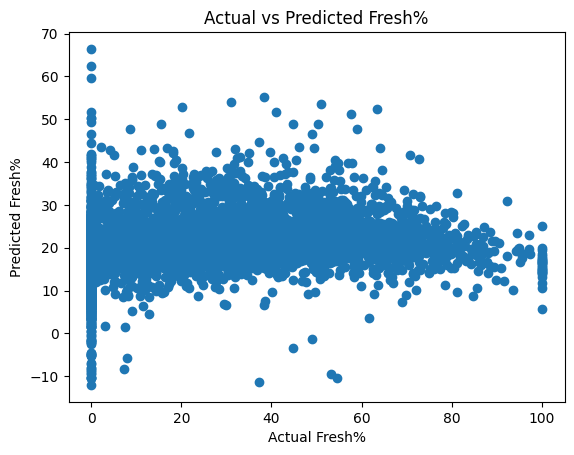

In [32]:
# Plot the actual vs predicted values for linear regression
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fresh%')
plt.ylabel('Predicted Fresh%')
plt.title('Actual vs Predicted Fresh%')
plt.show()

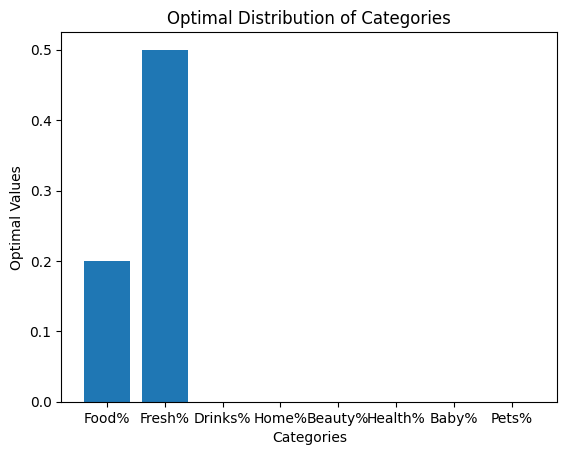

In [33]:
# Visualize the optimization results (e.g., bar chart of optimal solutions)
categories = ['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']
plt.bar(categories, result.x)
plt.xlabel('Categories')
plt.ylabel('Optimal Values')
plt.title('Optimal Distribution of Categories')
plt.show()

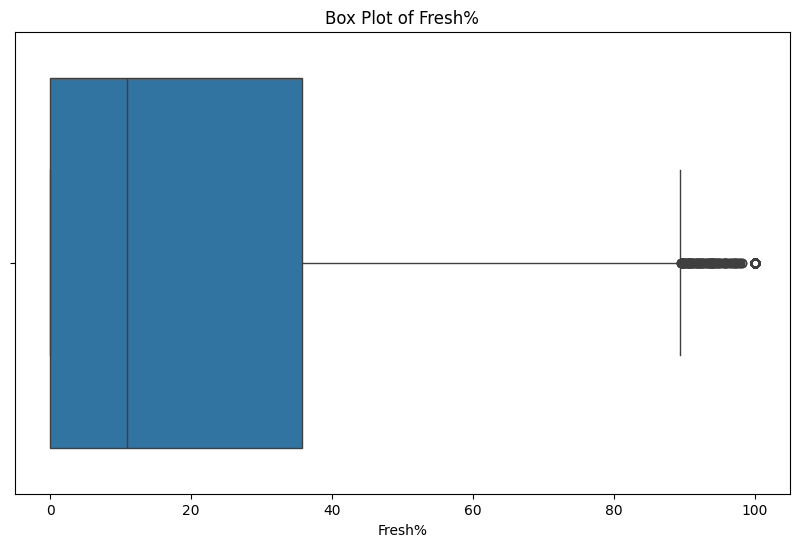

In [36]:
# Box plot for Fresh%
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fresh%'])
plt.title('Box Plot of Fresh%')
plt.xlabel('Fresh%')
plt.show()

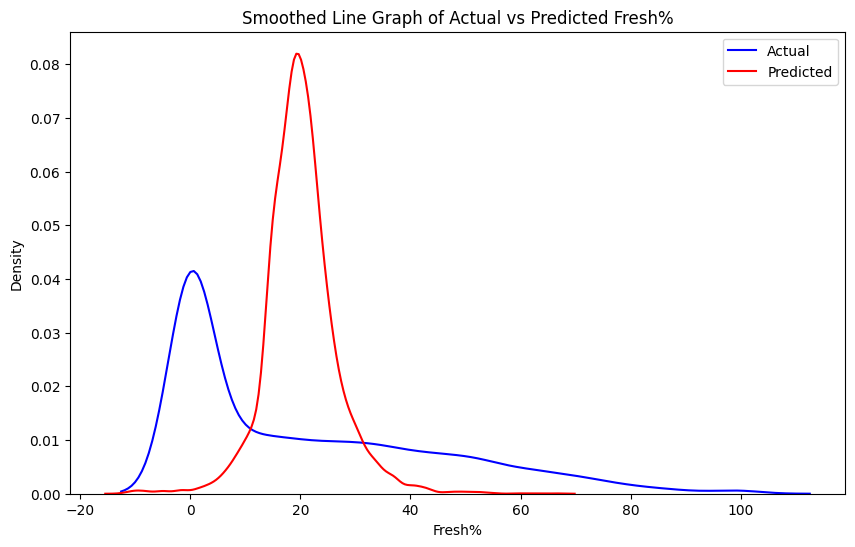

In [37]:
# Smoothed line graph for actual vs predicted Fresh%
plt.figure(figsize=(10, 6))

# Plot actual values
sns.kdeplot(y_test, label='Actual', color='blue')

# Plot predicted values
sns.kdeplot(y_pred, label='Predicted', color='red')

plt.title('Smoothed Line Graph of Actual vs Predicted Fresh%')
plt.xlabel('Fresh%')
plt.ylabel('Density')
plt.legend()
plt.show()

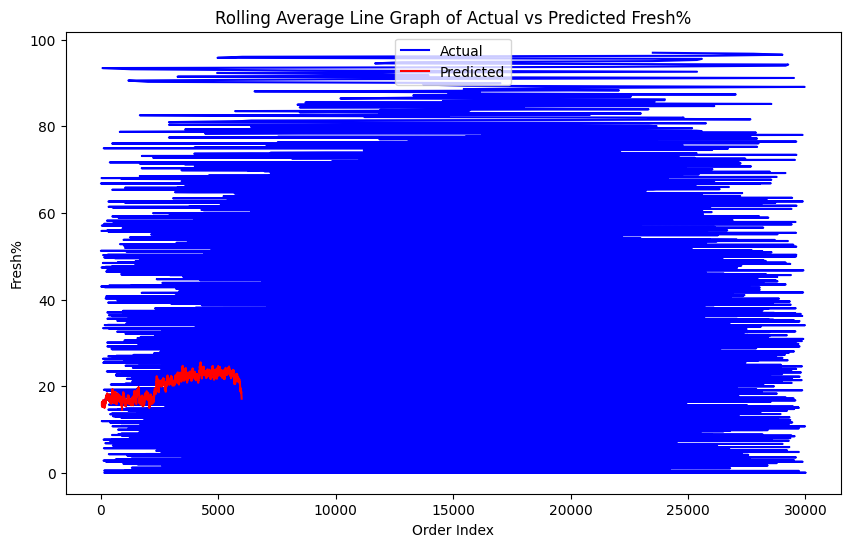

In [38]:
# Sort the test data and predictions for a smooth plot
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Compute the rolling average
window_size = 50  # Adjust the window size as needed
y_test_rolling = y_test_sorted.rolling(window=window_size).mean()
y_pred_rolling = pd.Series(y_pred_sorted).rolling(window=window_size).mean()

# Plot the rolling average
plt.figure(figsize=(10, 6))
plt.plot(y_test_rolling, label='Actual', color='blue')
plt.plot(y_pred_rolling, label='Predicted', color='red')
plt.title('Rolling Average Line Graph of Actual vs Predicted Fresh%')
plt.xlabel('Order Index')
plt.ylabel('Fresh%')
plt.legend()
plt.show()

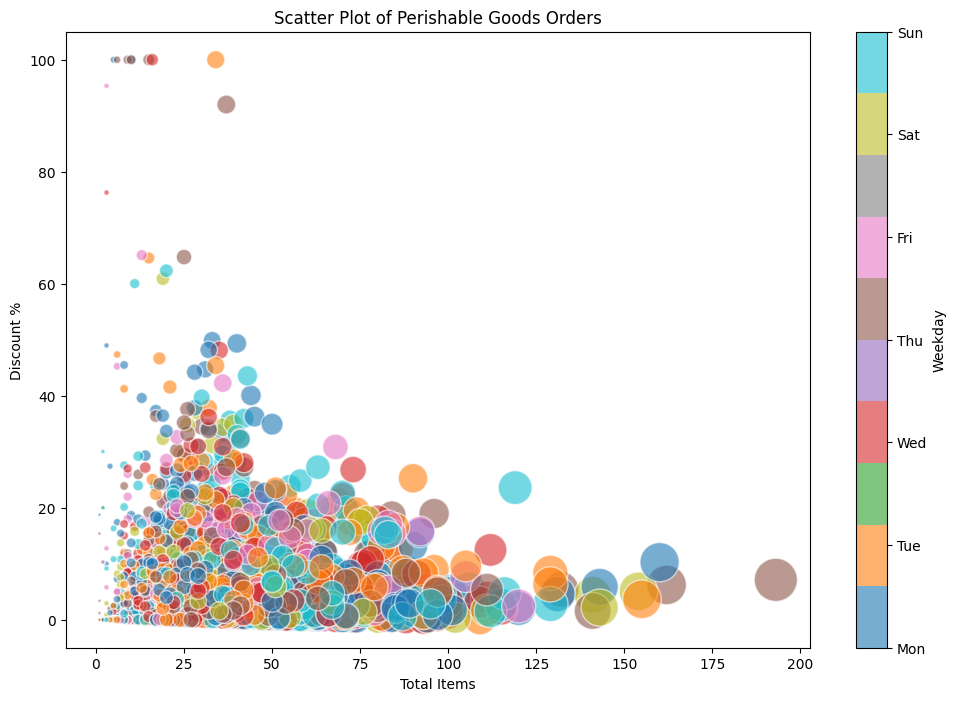

In [42]:
# Filter for orders with significant Fresh% (you can adjust the threshold as needed)
threshold_fresh = 50  # Adjust this threshold based on your definition of significant Fresh%
df_perishable = df[df['Fresh%'] >= threshold_fresh]

# Plotting parameters
plt.figure(figsize=(12, 8))

# Define colors based on weekday
colors = plt.cm.tab10(np.linspace(0, 1, 7))  # Adjust number of colors based on number of weekdays

# Scatter plot with varying circle sizes based on total_items and discount%
plt.scatter(df_perishable['total_items'], df_perishable['discount%'],
            s=df_perishable['total_items']*5, alpha=0.6, c=df_perishable['weekday'], cmap='tab10', edgecolors='w')

# Colorbar for weekdays
cb = plt.colorbar()
cb.set_label('Weekday')
cb.set_ticks(np.arange(1, 8))
cb.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjusting labels and title
plt.title('Scatter Plot of Perishable Goods Orders')
plt.xlabel('Total Items')
plt.ylabel('Discount %')

# Show plot
plt.show()